In [130]:
import pandas as pd
import numpy as np
movieReviews = pd.read_json("IMDB_reviews.json", lines = True)
movie = pd.read_json("IMDB_movie_details.json", lines = True)

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from nltk.corpus import stopwords # Stopwords 
from nltk.tokenize import word_tokenize # Word_tokenizer
import re
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import cross_validate

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('names')
from nltk.corpus import names
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package punkt to /Users/anjidong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anjidong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package names to /Users/anjidong/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [156]:
movieReviews.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [157]:
#check if any movie id is null
movieReviews['movie_id'].isnull().values.any()

False

In [158]:
movie.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [159]:
# return the most common entry in the array list
def most_common(lst):
    data = Counter(lst)
    return max(lst, key=data.get)



In [160]:
# most common movie that gets reviewed
movieReviews[movieReviews["movie_id"]==most_common(movieReviews['movie_id'])]

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
7068,20 July 2008,tt0468569,ur1293485,True,I got to see The Dark Knight on Wednesday nigh...,10,The Batman of our dreams! So much more than a ...
7069,16 July 2008,tt0468569,ur13846894,True,I must say I was excited for this movie since ...,10,Certainly Dark - Worth The Wait
7070,16 July 2008,tt0468569,ur2371300,True,I thought Batman Begins was a very well concei...,10,Best. Comic. Movie. EVER.
7071,16 July 2008,tt0468569,ur5237888,True,I think the big question...or the question eve...,10,The Dark Knight is as good as everyone says an...
7072,17 July 2008,tt0468569,ur2747265,True,(Synopsis) Bruce Wayne/Batman (Christian Bale)...,10,The dark and sinister mood of the film really ...
...,...,...,...,...,...,...,...
11908,20 July 2008,tt0468569,ur18648754,False,I was waiting for this film since September '0...,10,Simply Fantastic. Beats the hype.
11909,20 July 2008,tt0468569,ur12459428,False,"Yeah, I saw The Dark Knight yesterday night; t...",10,"Its really awesome, you gotta watch it to expe..."
11910,20 July 2008,tt0468569,ur15981877,False,Just saw the movie. I had a lot of expectation...,10,The movie was stunning !!!!!!!!!!!!!!!!!!!!!!!!!!
11911,19 July 2008,tt0468569,ur13888972,False,Batman has human weaknesses and is still a sup...,7,To Heath Ledger


In [161]:
print(movieReviews.iloc[11910]['review_text'])


Just saw the movie. I had a lot of expectations and expected them not to be fulfilled but the movie was above any kind of expectations.Christian bale - Was brilliant and his hardwork was stunning. Great performance from him.Joker- His actual name is going to be forgotten for sure. Wat a performance. Brilliant,Brilliant Brilliant .The best villain i have ever seen.Christopher nolan - amazing direction. A definite Oscar this year Overall the movie deserves 15/10 for its brilliance. a must watch not once but many times. I won't be surprised if it gets the IMDb no. 1 position


# Data cleaning

In [162]:
#check missing values
count = df.isnull().sum().sort_values(ascending=False)
count

genre             0
rating_x          0
release_date      0
review_date       0
is_spoiler        0
review_text       0
rating_y          0
review_summary    0
dtype: int64

In [163]:
df = movie.merge(movieReviews, on = 'movie_id')



In [164]:
# drop irrelevant cols
df = df.drop(['movie_id', 'duration','user_id', 'plot_summary','plot_synopsis'], axis = 1)
df.head()

,genre,rating_x,release_date,review_date,is_spoiler,review_text,rating_y,review_summary
0,"[Action, Thriller]",6.9,1992-06-05,5 March 2008,True,The second Tom Clancy novel made into a film (...,6,decent Clancy thriller
1,"[Action, Thriller]",6.9,1992-06-05,15 October 2007,True,The second in what looks like becoming the 'Ja...,7,Jack Ryan Chapter II
2,"[Action, Thriller]",6.9,1992-06-05,16 September 2013,True,I was not a fan of The Hunt For Red October. I...,8,It's filled to the brim with excitement and it...
3,"[Action, Thriller]",6.9,1992-06-05,15 May 2007,True,Jack Ryan (Harrison Ford) is a CIA analyst who...,7,Patriotic Gore.
4,"[Action, Thriller]",6.9,1992-06-05,29 February 2004,True,This was one of the big summer movies of 1992....,7,Harrison Ford In Another Tom Clancy Adaptation


In [165]:
# extract release year and month (replace)



In [166]:
# extract review year (replace)

# df_reviews_dataset['review_date'] = pd.to_datetime(df_reviews_dataset['review_date'],format='%d %B %Y')



In [167]:
# change duration to ranges (1, 2, 3, etc)



In [168]:
df_simple = df.copy()
df_simple = df[["is_spoiler","review_text","review_summary"]]
df_simple

,is_spoiler,review_text,review_summary
0,True,The second Tom Clancy novel made into a film (...,decent Clancy thriller
1,True,The second in what looks like becoming the 'Ja...,Jack Ryan Chapter II
2,True,I was not a fan of The Hunt For Red October. I...,It's filled to the brim with excitement and it...
3,True,Jack Ryan (Harrison Ford) is a CIA analyst who...,Patriotic Gore.
4,True,This was one of the big summer movies of 1992....,Harrison Ford In Another Tom Clancy Adaptation
...,...,...,...
573901,False,Dunkirk is a beautifully done movie that has h...,Possibly the greatest war film ever made
573902,False,Dunkirk is one of the rare cases a film receiv...,Why this could actually be one of the best war...
573903,False,Film gave insufficient background on what was ...,Disappointed
573904,False,"In screen writing, a shot is an image captured...",Dunkirk for Millennials


In [169]:
df_simple.iloc[1]['review_text']

'The second in what looks like becoming the \'Jack Ryan\' catalogue of films sees a change of director and leading star. Phil Noyce takes the helm and Harrison Ford (who has reportedly signed a package deal) slips into the role of CIA analyst Ryan, after Alec Baldwin apparently asked for too much to reprise the part."Patriot Games" finds Ryan\'s family threatened by an Irish terrorist whose brother Jack killed. Performances are solid in a film which develops into an intriguing work. The plot holds its own until the very end when Phil Noyce opts for a predictable audience pleasing finale which is disappointing.Friday, September 25, 1992 - Hoyts Forest Hill Chase'

In [170]:
# convert the date column into a datetime object
movieReviews['review_date'] = pd.to_datetime(movieReviews['review_date'])

# extract the day, month, and year components
movieReviews['day'] = movieReviews['review_date'].dt.day
movieReviews['month'] = movieReviews['review_date'].dt.month
movieReviews['year'] = movieReviews['review_date'].dt.year

movieReviews['review_combined'] = movieReviews['review_summary']+ ' ' + movieReviews['review_text']

movieReviews = movieReviews.drop(columns=['review_summary','review_text', 'review_date'])

!pip install contractions
!pip install Unidecode

import unidecode
import re
import time
import string
import statistics
import contractions


# Remove links from text
def remove_links(text):
    text = re.sub(r'http\S+', '', text)
    return text

# Remove accented characters
def accented_characters_removal(text):
        # Unidecode() - It takes unicode data & tries to represent it to ASCII characters.
    text = unidecode.unidecode(text)
    return text

# Remove repeated characters and punctuations
def reducing_incorrect_character_repeatation(text):
    """
    This Function will reduce repeatition to two characters
    for alphabets and to one character for punctuations.

    arguments:
         input_text: "text" of type "String".

    return:
        value: Finally formatted text with alphabets repeating to
        two characters & punctuations limited to one repeatition
    """

    # Pattern matching for all case alphabets
    Pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)

    # Limiting all the  repeatation to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text)

    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')

    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)

    # The below statement is replacing repeatation of spaces that occur more than two times with that of one occurrence.
    Final_Formatted = re.sub(' {2,}',' ', Combined_Formatted)

    return Final_Formatted

# Expand contraction words
def expand_contractions(text):
    """
    This Function will expands contractions in words.
    arguments:
         input_text: "text" of type "String".
    return:
        value: "text" with expanded contractions .
    """
    # creating an empty list
    expanded_words = []
    for word in text.split():
      # using contractions.fix to expand the shotened words
      expanded_words.append(contractions.fix(word))

    String_Of_tokens = ' '.join(expanded_words)

    return String_Of_tokens

# Remove special characters
def removing_special_characters(text):
    """
    This Function will remove special characters (including punctualization).
    arguments:
         input_text: "text" of type "String".
    return:
        value: "text" with special characters removed.
    """
    pattern = r"[^a-zA-Z]"
    text = re.sub(pattern,' ', text)
    return text

# Text cleaning
def text_clean(text):

    text = text.lower()
    text = remove_links(text)
    text = expand_contractions(text)
    text = accented_characters_removal(text)
    text = removing_special_characters(text)
    text = reducing_incorrect_character_repeatation(text)
    return text

movieReviews['review_combined'] = movieReviews['review_combined'].apply(text_clean)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 1.1 MB/s eta 0:00:00a 0:00:01


In [172]:
movieReviews.head()

,movie_id,user_id,is_spoiler,rating,day,month,year,review_combined
0,tt0111161,ur1898687,True,10,10,2,2006,a classic piece of unforgettable film making i...
1,tt0111161,ur0842118,True,10,6,9,2000,simply amazing the best film of the s the shaw...
2,tt0111161,ur1285640,True,8,3,8,2001,the best story ever told on film i believe tha...
3,tt0111161,ur1003471,True,10,1,9,2002,busy dying or busy living yes there are spoile...
4,tt0111161,ur0226855,True,8,20,5,2004,great story wondrously told and acted at the h...


In [126]:
# tokenize 
# stem 
# remove stop_words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def tokenizer(entry):
    final_lst = []
    lst = word_tokenize(entry)
    lst_updated = [stemmer.stem(word) for word in lst]
    for i in lst_updated:
        if i not in stop_words:
            final_lst.append(i)
            
    return final_lst
    
def tokenize_series(lst):
    final_lst = []
    for entry in lst:
        tokenized_entry = tokenizer(entry)
        final_lst.append(tokenized_entry)
    return final_lst

In [132]:
movieReviews['review_text'][0]

'In its Oscar year, Shawshank Redemption (written and directed by Frank Darabont, after the novella Rita Hayworth and the Shawshank Redemption, by Stephen King) was nominated for seven Academy Awards, and walked away with zero. Best Picture went to Forrest Gump, while Shawshank and Pulp Fiction were "just happy to be nominated." Of course hindsight is 20/20, but while history looks back on Gump as a good film, Pulp and Redemption are remembered as some of the all-time best. Pulp, however, was a success from the word "go," making a huge splash at Cannes and making its writer-director an American master after only two films. For Andy Dufresne and Co., success didn\'t come easy. Fortunately, failure wasn\'t a life sentence.After opening on 33 screens with take of $727,327, the $25M film fell fast from theatres and finished with a mere $28.3M. The reasons for failure are many. Firstly, the title is a clunker. While iconic to fans today, in 1994, people knew not and cared not what a \'Shaws

In [135]:
tokenizer("In its Oscar year, Shawshank Redemption (written and directed by Frank Darabont, after the novella Rita Hayworth and the Shawshank Redemption, by Stephen King) was nominated for seven Academy Awards, and walked away with zero. Best Picture went to Forrest Gump, while Shawshank and Pulp Fiction were just happy to be nominated.")

['oscar',
 'year',
 ',',
 'shawshank',
 'redempt',
 '(',
 'written',
 'direct',
 'frank',
 'darabont',
 ',',
 'novella',
 'rita',
 'hayworth',
 'shawshank',
 'redempt',
 ',',
 'stephen',
 'king',
 ')',
 'wa',
 'nomin',
 'seven',
 'academi',
 'award',
 ',',
 'walk',
 'away',
 'zero',
 '.',
 'best',
 'pictur',
 'went',
 'forrest',
 'gump',
 ',',
 'shawshank',
 'pulp',
 'fiction',
 'happi',
 'nomin',
 '.']

In [175]:
test = movieReviews.copy()
test = test.head()
test

,movie_id,user_id,is_spoiler,rating,day,month,year,review_combined
0,tt0111161,ur1898687,True,10,10,2,2006,a classic piece of unforgettable film making i...
1,tt0111161,ur0842118,True,10,6,9,2000,simply amazing the best film of the s the shaw...
2,tt0111161,ur1285640,True,8,3,8,2001,the best story ever told on film i believe tha...
3,tt0111161,ur1003471,True,10,1,9,2002,busy dying or busy living yes there are spoile...
4,tt0111161,ur0226855,True,8,20,5,2004,great story wondrously told and acted at the h...


In [177]:
test['tokenized']=tokenize_series(test['review_combined'])

In [178]:
test

,movie_id,user_id,is_spoiler,rating,day,month,year,review_combined,tokenized
0,tt0111161,ur1898687,True,10,10,2,2006,a classic piece of unforgettable film making i...,"[classic, piec, unforgett, film, make, oscar, ..."
1,tt0111161,ur0842118,True,10,6,9,2000,simply amazing the best film of the s the shaw...,"[simpli, amaz, best, film, shawshank, redempt,..."
2,tt0111161,ur1285640,True,8,3,8,2001,the best story ever told on film i believe tha...,"[best, stori, ever, told, film, believ, thi, f..."
3,tt0111161,ur1003471,True,10,1,9,2002,busy dying or busy living yes there are spoile...,"[busi, die, busi, live, ye, spoiler, thi, film..."
4,tt0111161,ur0226855,True,8,20,5,2004,great story wondrously told and acted at the h...,"[great, stori, wondrous, told, act, heart, thi..."


In [180]:
movieReviews['tokenized'] = tokenize_series(movieReviews['review_combined'])
movieReviews.head()

,movie_id,user_id,is_spoiler,rating,day,month,year,review_combined,tokenized
0,tt0111161,ur1898687,True,10,10,2,2006,a classic piece of unforgettable film making i...,"[classic, piec, unforgett, film, make, oscar, ..."
1,tt0111161,ur0842118,True,10,6,9,2000,simply amazing the best film of the s the shaw...,"[simpli, amaz, best, film, shawshank, redempt,..."
2,tt0111161,ur1285640,True,8,3,8,2001,the best story ever told on film i believe tha...,"[best, stori, ever, told, film, believ, thi, f..."
3,tt0111161,ur1003471,True,10,1,9,2002,busy dying or busy living yes there are spoile...,"[busi, die, busi, live, ye, spoiler, thi, film..."
4,tt0111161,ur0226855,True,8,20,5,2004,great story wondrously told and acted at the h...,"[great, stori, wondrous, told, act, heart, thi..."


In [195]:
# reduced set to 2017 movies
movieR = movieReviews[movieReviews['year'] == 2017]
movieR

,movie_id,user_id,is_spoiler,rating,day,month,year,review_combined,tokenized
75,tt0111161,ur81689327,True,9,25,10,2017,awesome classic this movie will be one of my f...,"[awesom, classic, thi, movi, one, favorit, tim..."
76,tt0111161,ur70090039,True,10,20,9,2017,if you a movie lover do not miss a second to s...,"[movi, lover, miss, second, see, thi, movi, sh..."
77,tt0111161,ur79297787,True,9,10,8,2017,mona lisa of film we just do not get movies li...,"[mona, lisa, film, get, movi, like, anymor, sh..."
78,tt0111161,ur79209549,True,10,7,8,2017,very nice excellent movie i have watched it tw...,"[veri, nice, excel, movi, watch, twice, thrice..."
79,tt0111161,ur20574753,True,10,5,6,2017,worthy of the number one spot one of the best ...,"[worthi, number, one, spot, one, best, movi, d..."
...,...,...,...,...,...,...,...,...,...
573265,tt0185937,ur68925471,False,9,27,4,2017,teens set out in the woods of burkittsville to...,"[teen, set, wood, burkittsvil, document, legen..."
573283,tt0185937,ur55056252,False,1,25,7,2017,annoying screaming and crying for minutes a ma...,"[annoy, scream, cri, minut, masterpiec, thi, r..."
573284,tt0185937,ur37072477,False,1,13,6,2017,a disappointment people will say the movie is ...,"[disappoint, peopl, say, movi, amaz, becaus, s..."
573430,tt0185937,ur58619720,False,10,15,4,2017,one of the most effective horror movies ever m...,"[one, effect, horror, movi, ever, made, fan, h..."


In [199]:
movieR = movieR.drop(['day','month','year'],axis=1)

In [201]:
movieR = movieR.drop(['review_combined'],axis=1)

In [205]:
movie = movie.drop(['plot_summary','plot_synopsis'],axis = 1)

In [206]:
movieR = movieR.merge(movie, on = 'movie_id')
movieR.head()

,movie_id,user_id,is_spoiler,rating_x,tokenized,duration,genre,rating_y,release_date
0,tt0111161,ur81689327,True,9,"[awesom, classic, thi, movi, one, favorit, tim...",2h 22min,"[Crime, Drama]",9.3,1994-10-14
1,tt0111161,ur70090039,True,10,"[movi, lover, miss, second, see, thi, movi, sh...",2h 22min,"[Crime, Drama]",9.3,1994-10-14
2,tt0111161,ur79297787,True,9,"[mona, lisa, film, get, movi, like, anymor, sh...",2h 22min,"[Crime, Drama]",9.3,1994-10-14
3,tt0111161,ur79209549,True,10,"[veri, nice, excel, movi, watch, twice, thrice...",2h 22min,"[Crime, Drama]",9.3,1994-10-14
4,tt0111161,ur20574753,True,10,"[worthi, number, one, spot, one, best, movi, d...",2h 22min,"[Crime, Drama]",9.3,1994-10-14


In [208]:
movieR = movieR.drop(['movie_id','rating_y'],axis=1)
movieR.head()

,user_id,is_spoiler,rating_x,tokenized,duration,genre,release_date
0,ur81689327,True,9,"[awesom, classic, thi, movi, one, favorit, tim...",2h 22min,"[Crime, Drama]",1994-10-14
1,ur70090039,True,10,"[movi, lover, miss, second, see, thi, movi, sh...",2h 22min,"[Crime, Drama]",1994-10-14
2,ur79297787,True,9,"[mona, lisa, film, get, movi, like, anymor, sh...",2h 22min,"[Crime, Drama]",1994-10-14
3,ur79209549,True,10,"[veri, nice, excel, movi, watch, twice, thrice...",2h 22min,"[Crime, Drama]",1994-10-14
4,ur20574753,True,10,"[worthi, number, one, spot, one, best, movi, d...",2h 22min,"[Crime, Drama]",1994-10-14


In [213]:
movieR['release_date'] = movieR['release_date'].str[0:4]
movieR.head()

,user_id,is_spoiler,rating_x,tokenized,duration,genre,release_date
0,ur81689327,True,9,"[awesom, classic, thi, movi, one, favorit, tim...",2h 22min,"[Crime, Drama]",1994
1,ur70090039,True,10,"[movi, lover, miss, second, see, thi, movi, sh...",2h 22min,"[Crime, Drama]",1994
2,ur79297787,True,9,"[mona, lisa, film, get, movi, like, anymor, sh...",2h 22min,"[Crime, Drama]",1994
3,ur79209549,True,10,"[veri, nice, excel, movi, watch, twice, thrice...",2h 22min,"[Crime, Drama]",1994
4,ur20574753,True,10,"[worthi, number, one, spot, one, best, movi, d...",2h 22min,"[Crime, Drama]",1994


In [215]:
movieR['duration'] = movieR['duration'].str[0]
movieR.head()

,user_id,is_spoiler,rating_x,tokenized,duration,genre,release_date
0,ur81689327,True,9,"[awesom, classic, thi, movi, one, favorit, tim...",2,"[Crime, Drama]",1994
1,ur70090039,True,10,"[movi, lover, miss, second, see, thi, movi, sh...",2,"[Crime, Drama]",1994
2,ur79297787,True,9,"[mona, lisa, film, get, movi, like, anymor, sh...",2,"[Crime, Drama]",1994
3,ur79209549,True,10,"[veri, nice, excel, movi, watch, twice, thrice...",2,"[Crime, Drama]",1994
4,ur20574753,True,10,"[worthi, number, one, spot, one, best, movi, d...",2,"[Crime, Drama]",1994


In [216]:
movieR.shape

(45103, 7)

In [218]:
# change names to protagonist
male_names = names.words('male.txt')
female_names = names.words('female.txt')
all_names = set(male_names + female_names)
all_names = [name.lower() for name in all_names]
def change_name(entry):
    lst = []
    for word in entry:
        if word in all_names:
            lst.append("protagonist")
        else:
            lst.append(word)
    return lst
def change_name_series(series):
    lst = []
    for entry in series:
        lst.append(change_name(entry))
    return lst            



In [221]:
movieR['tokenized'] = change_name_series(movieR['tokenized'])

In [222]:
# singularize entries
def singular(entry):
    lst = []
    for word in entry:        
        lst.append(singularize(word))
    return lst
def singular_series(series):
    lst = []
    for entry in series:
        lst.append(singular(entry))
    return lst            

In [224]:
# movieR['tokenized'] = singular_series(movieR['tokenized'])

In [227]:
movieR.to_json('tokenized.json')

In [ ]:
# natural language processing
# use vectorizer

In [228]:
movieR.head()

,user_id,is_spoiler,rating_x,tokenized,duration,genre,release_date
0,ur81689327,True,9,"[awesom, classic, thi, movi, one, favorit, tim...",2,"[Crime, Drama]",1994
1,ur70090039,True,10,"[movi, lover, miss, second, protagonist, thi, ...",2,"[Crime, Drama]",1994
2,ur79297787,True,9,"[protagonist, protagonist, film, get, movi, li...",2,"[Crime, Drama]",1994
3,ur79209549,True,10,"[veri, nice, excel, movi, watch, twice, thrice...",2,"[Crime, Drama]",1994
4,ur20574753,True,10,"[worthi, number, one, spot, one, best, movi, d...",2,"[Crime, Drama]",1994


# Data Analysis I

In [229]:
# histogram of spoiler vs non-spoiler
sns.histplot(data = df, x = "is_spoiler")

,user_id,is_spoiler,rating_x,tokenized,duration,genre,release_date
0,ur81689327,True,9,"[awesom, classic, thi, movi, one, favorit, tim...",2,"[Crime, Drama]",1994
1,ur70090039,True,10,"[movi, lover, miss, second, protagonist, thi, ...",2,"[Crime, Drama]",1994
2,ur79297787,True,9,"[protagonist, protagonist, film, get, movi, li...",2,"[Crime, Drama]",1994
3,ur79209549,True,10,"[veri, nice, excel, movi, watch, twice, thrice...",2,"[Crime, Drama]",1994
4,ur20574753,True,10,"[worthi, number, one, spot, one, best, movi, d...",2,"[Crime, Drama]",1994


In [ ]:
# histplot - percentage of spoiler for rating level (groupby)




In [ ]:
# pieplot - percentage of spoiler that contains the word "spoiler", ""

In [ ]:
# histplot - average # of words for spoiler vs non-spoiler / lineplot - distribution of # words for spoiler and non-spoiler

In [ ]:
# spoilers by genre

In [ ]:
# spoilers by release date

# Machine Learning

In [233]:
movieR.head()

,user_id,is_spoiler,rating_x,tokenized,duration,genre,release_date
0,ur81689327,True,9,"[awesom, classic, thi, movi, one, favorit, tim...",2,"[Crime, Drama]",1994
1,ur70090039,True,10,"[movi, lover, miss, second, protagonist, thi, ...",2,"[Crime, Drama]",1994
2,ur79297787,True,9,"[protagonist, protagonist, film, get, movi, li...",2,"[Crime, Drama]",1994
3,ur79209549,True,10,"[veri, nice, excel, movi, watch, twice, thrice...",2,"[Crime, Drama]",1994
4,ur20574753,True,10,"[worthi, number, one, spot, one, best, movi, d...",2,"[Crime, Drama]",1994


In [1]:
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0
  Using cached scikit_learn-1.2.2-cp311-cp311-macosx_10_9_x86_64.whl (9.0 MB)
  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [3]:

from imblearn.pipeline import Pipeline, make_pipeline


In [10]:
movieR = pd.read_json("tokenized.json", lines = False)

In [119]:
movieR.head()

,user_id,is_spoiler,rating_x,tokenized,duration,genre,release_date
0,ur81689327,True,9,"[awesom, classic, thi, movi, one, favorit, tim...",2,"[Crime, Drama]",1994
1,ur70090039,True,10,"[movi, lover, miss, second, protagonist, thi, ...",2,"[Crime, Drama]",1994
2,ur79297787,True,9,"[protagonist, protagonist, film, get, movi, li...",2,"[Crime, Drama]",1994
3,ur79209549,True,10,"[veri, nice, excel, movi, watch, twice, thrice...",2,"[Crime, Drama]",1994
4,ur20574753,True,10,"[worthi, number, one, spot, one, best, movi, d...",2,"[Crime, Drama]",1994


In [ ]:
X = movieR.drop(['is_spoiler','user_id'], axis=1)
y = movieR['is_spoiler']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [122]:
movieR.drop(['user_id','is_spoiler'], axis=1)

,rating_x,tokenized,duration,genre,release_date
0,9,"[awesom, classic, thi, movi, one, favorit, tim...",2,"[Crime, Drama]",1994
1,10,"[movi, lover, miss, second, protagonist, thi, ...",2,"[Crime, Drama]",1994
2,9,"[protagonist, protagonist, film, get, movi, li...",2,"[Crime, Drama]",1994
3,10,"[veri, nice, excel, movi, watch, twice, thrice...",2,"[Crime, Drama]",1994
4,10,"[worthi, number, one, spot, one, best, movi, d...",2,"[Crime, Drama]",1994
...,...,...,...,...,...
45098,9,"[teen, set, protagonist, burkittsvil, document...",1,"[Horror, Mystery]",1999
45099,1,"[annoy, scream, cri, minut, masterpiec, thi, r...",1,"[Horror, Mystery]",1999
45100,1,"[disappoint, peopl, protagonist, movi, amaz, b...",1,"[Horror, Mystery]",1999
45101,10,"[one, effect, horror, movi, ever, made, protag...",1,"[Horror, Mystery]",1999


# fancy vectorizer

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [78]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

skf = StratifiedKFold(10)
scoring = {
    'accuracy' : make_scorer(accuracy_score), 
    'precision' : make_scorer(precision_score),
    'recall' : make_scorer(recall_score), 
    'f1_score' : make_scorer(f1_score)
}


In [79]:
# convert the date column into a datetime object
movieReviews['review_date'] = pd.to_datetime(movieReviews['review_date'])

# extract the day, month, and year components
movieReviews['day'] = movieReviews['review_date'].dt.day
movieReviews['month'] = movieReviews['review_date'].dt.month
movieReviews['year'] = movieReviews['review_date'].dt.year

movieReviews['review_combined'] = movieReviews['review_summary']+ ' ' + movieReviews['review_text']

movieReviews = movieReviews.drop(columns=['review_summary','review_text', 'review_date'])


In [80]:
movieReviews = movieReviews[movieReviews['year']==2017]

In [81]:
movieReviews.head()

,movie_id,user_id,is_spoiler,rating,day,month,year,review_combined
75,tt0111161,ur81689327,True,9,25,10,2017,Awesome Classic This movie will be one of my f...
76,tt0111161,ur70090039,True,10,20,9,2017,"If you a movie lover, Don't miss a second to s..."
77,tt0111161,ur79297787,True,9,10,8,2017,Mona Lisa of Film We just do not get movies li...
78,tt0111161,ur79209549,True,10,7,8,2017,"Very nice! Excellent movie, I have watched it ..."
79,tt0111161,ur20574753,True,10,5,6,2017,Worthy of the number one spot. One of the best...


In [82]:
X = movieReviews['review_combined']
y = movieReviews['is_spoiler']

In [83]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [84]:
clf_pipeline = Pipeline([
            ('vect', TfidfVectorizer(ngram_range=(1,1))),
            ('clf', LogisticRegression(max_iter=10000))
        ])

In [85]:
score = cross_validate(clf_pipeline, X, y, cv = skf, scoring=scoring, n_jobs = 5)

In [86]:
score

{'fit_time': array([9.03329825, 9.71786332, 8.58790994, 8.92190075, 9.75859308,
        9.27354002, 8.81522417, 8.87349081, 8.55672002, 9.02108884]),
 'score_time': array([0.67518997, 0.71868372, 0.75276494, 0.68401933, 0.62919283,
        0.68719697, 0.71428204, 0.77713108, 0.64878798, 0.52411437]),
 'test_accuracy': array([0.72422966, 0.73021503, 0.74883618, 0.72084257, 0.71773836,
        0.7232816 , 0.76363636, 0.73192905, 0.73503326, 0.73237251]),
 'test_precision': array([0.6719057 , 0.62625   , 0.72413793, 0.58849558, 0.58276644,
        0.60414129, 0.72541507, 0.6779661 , 0.62185792, 0.62695548]),
 'test_recall': array([0.2410148 , 0.35306554, 0.3255814 , 0.37491191, 0.36222692,
        0.34954193, 0.40028189, 0.28188865, 0.40126939, 0.3674189 ]),
 'test_f1_score': array([0.35477178, 0.45155475, 0.44919786, 0.45802841, 0.44676228,
        0.44285714, 0.51589464, 0.39820806, 0.48778397, 0.46331703])}

In [88]:
def print_kfold_scores(scores):
    print("Accuracy = ", scores['test_accuracy'])
    print("")
    print("Precision = ", scores['test_precision'])
    print("")
    print("Recall = ", scores['test_recall'])
    print("")
    print("F1 score = ", scores['test_f1_score'])
    print("")
    print("fit_time (s) = ", scores['fit_time'])
    print("")
    print("score_time (s) = ", scores['score_time'])
print_kfold_scores(score)

Accuracy =  [0.72422966 0.73021503 0.74883618 0.72084257 0.71773836 0.7232816
 0.76363636 0.73192905 0.73503326 0.73237251]

Precision =  [0.6719057  0.62625    0.72413793 0.58849558 0.58276644 0.60414129
 0.72541507 0.6779661  0.62185792 0.62695548]

Recall =  [0.2410148  0.35306554 0.3255814  0.37491191 0.36222692 0.34954193
 0.40028189 0.28188865 0.40126939 0.3674189 ]

F1 score =  [0.35477178 0.45155475 0.44919786 0.45802841 0.44676228 0.44285714
 0.51589464 0.39820806 0.48778397 0.46331703]

fit_time (s) =  [9.03329825 9.71786332 8.58790994 8.92190075 9.75859308 9.27354002
 8.81522417 8.87349081 8.55672002 9.02108884]

score_time (s) =  [0.67518997 0.71868372 0.75276494 0.68401933 0.62919283 0.68719697
 0.71428204 0.77713108 0.64878798 0.52411437]


In [114]:
accuracy = score['test_accuracy'][6]

In [115]:
precision = score['test_precision'][6]

In [116]:
recall = score['test_recall'][6]

In [108]:
avg_test_accuracy

0.7328114571869404

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.0 MB/s eta 0:00:0000:0100:01


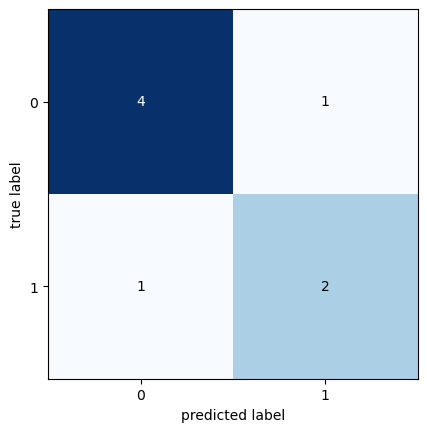

In [97]:
!pip install mlxtend

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt




In [98]:
def calculate(real_positives, real_negatives, precision, recall, accuracy):
    TP = recall * real_positives
    FN = real_positives - TP
    FP = TP/precision-TP
    TN = (real_positives+real_negatives)*accuracy-TP
    return [TN, FP,FN,TP]

In [117]:
real_positives =2279
real_negatives = 4938
calculate(real_positives, real_negatives, precision, recall, accuracy)

[4598.921212121212, 345.30303030303025, 1366.7575757575758, 912.2424242424242]

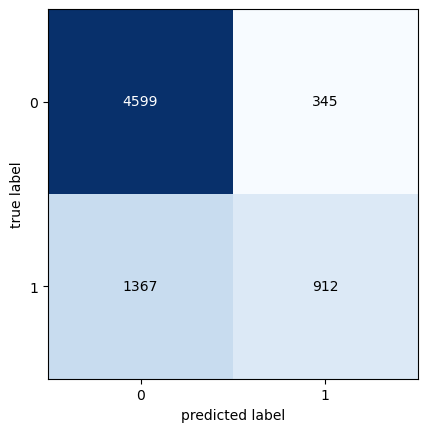

In [118]:
binary1 = np.array([[4599, 345],
                    [1367, 912]])

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

accuracy: 0.76
recall: 0.40
precision: 0.73



Precision is ~73%, false positive is low, non-spoilers are tend not be wrongly classfied
recall is pretty bad, 40%, bad to detect spoilers
in our case, we want high recall (get rid of spoilers)


In [125]:
TN = 4628
TP=602
FN=1677
FP=310
(TP+TN)/(TP+FN+TP+TN)

0.6964975362897856